In [55]:
import pandas as pd
data=pd.read_excel(r"C:\Users\SAMSUNG\Desktop\추가데이터\전체자료_(강우량추가).xlsx")


In [56]:
data.columns

Index(['Unnamed: 0', 'GU_NAME', 'ADM_NM', '동면적(k㎡)', '인구수', '인구밀도(명/km²)',
       '동단위우량', '동단위시우량', '침수횟수', '경사도', '양호비율', '도로_건물_면적_비율', '녹지_면적_비율',
       '제방', '수문', '암거', '구난시설', '노후건물개수', '노후_건물_밀도(동/km²)', '행정동_코드',
       '월평균소득', '면적당_소비액(백만원/km²)', '분기평균총지출', '고령자비율', '장애인비율', '행정동코드', '면적',
       '지하건물', '지하건물_밀도(동/km²)', '빗물펌프장까지의거리', '평균고도', '하천까지의거리', '일일최대강수량',
       '집중호우_발생횟수', '하천면적'],
      dtype='object')

In [57]:
# 침수여부
data["침수여부"]=0
data.loc[data["침수횟수"]>=1,"침수여부"]=1
data["침수여부"].value_counts()
data['구단위시우량']=data['동단위우량']/data["동면적(k㎡)"]

In [58]:
# 면적당 "제방","수문","암거"
data["면적당제방"]=data["제방"]/data["동면적(k㎡)"]
data["면적당수문"]=data["수문"]/data["동면적(k㎡)"]
data["면적당암거"]=data["암거"]/data["동면적(k㎡)"]
data['면적당노후건물개수']=data["노후건물개수"]/data["동면적(k㎡)"]
data["면적당지하건물"]=data["지하건물"]/data["동면적(k㎡)"]


In [59]:
target="침수여부"
#use_feature=["구단위시우량","경사도","양호비율","도로_건물_면적_비율","녹지_면적_비율","제방","수문","암거","노후건물개수","빗물펌프장까지의거리","지하건물","평균고도",'하천까지의거리']
#use_feature=["구단위시우량",'집중호우_발생횟수','일일최대강수량',"경사도","양호비율","도로_건물_면적_비율","녹지_면적_비율","제방","수문","암거","노후건물개수","빗물펌프장까지의거리","지하건물","평균고도",'하천까지의거리']
#use_feature=["구단위시우량",'일일최대강수량',"경사도","양호비율","도로_건물_면적_비율","녹지_면적_비율","면적당제방","면적당수문","면적당암거","면적당노후건물개수","빗물펌프장까지의거리","면적당지하건물","평균고도",'하천까지의거리']
use_feature=["구단위시우량","경사도","양호비율","도로_건물_면적_비율","녹지_면적_비율","면적당제방","면적당수문","면적당암거","면적당노후건물개수","빗물펌프장까지의거리","면적당지하건물","평균고도",'하천까지의거리']

In [60]:
data[use_feature]

,구단위시우량,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,면적당제방,면적당수문,면적당암거,면적당노후건물개수,빗물펌프장까지의거리,면적당지하건물,평균고도,하천까지의거리
0,7.36802,0.153750,0.245283,0.307107,0.386556,2.439024,0.000000,77.235772,394.308943,4389.596516,453.658537,44.422401,0.909096
1,7.36802,0.250000,0.832402,0.137073,0.641702,0.000000,0.000000,28.859060,230.872483,4633.405055,305.369128,107.956271,0.490531
2,7.36802,0.314583,0.906250,0.147000,0.225413,17.621145,1.321586,17.621145,428.193833,5699.673727,358.149780,147.729398,0.579168
3,7.36802,0.229615,0.974132,0.087765,0.164587,9.357384,2.254791,19.278467,150.056370,5465.810242,202.593010,273.213812,0.104944
4,7.36802,0.346667,1.000000,0.169418,0.461577,0.000000,0.000000,27.777778,280.555556,4182.759161,161.111111,113.928953,1.427201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,8.79600,0.072143,0.633929,0.438031,0.005765,0.000000,0.000000,23.943662,598.591549,1179.328824,1109.859155,17.434927,1.346759
403,8.79600,0.176154,0.608911,0.358275,0.059004,2.484472,0.000000,13.043478,554.037267,1960.757507,819.254658,28.949684,1.073927
404,8.79600,0.151786,0.738636,0.229434,0.045133,0.000000,0.000000,9.782609,11.956522,1646.603436,6.521739,30.338302,1.163773
405,8.79600,0.170909,0.797872,0.224797,0.147004,12.179487,0.641026,43.589744,367.948718,2376.349662,457.692308,39.652645,0.369031


랜덤포레스트

In [61]:
# 1, Random_Forest
import sklearn.ensemble as skens
import sklearn.model_selection as skmod
import sklearn.preprocessing as skpre
import numpy as np
import scipy as sp
np.random.seed(10)

#모델 만들기 -> 최대 깊이 탐색
RT_model=skens.RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=10,n_jobs=-1,oob_score=True)
RT_model.fit(X=data[use_feature],y=data[target])

RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True,
                       random_state=10)

In [62]:
max_depth=max([estimator.tree_.max_depth for estimator in RT_model.estimators_]) # 최대 깊이 추출
print(max_depth)

22


In [63]:
# 최적의 깊이 탐색
params={"max_depth":sp.stats.randint(2,max_depth)}
RT_random_search = skmod.RandomizedSearchCV(RT_model,
 param_distributions=params, n_iter=100, cv=3, scoring='accuracy', random_state=10)

In [64]:
RT_random_search.fit(X=data[use_feature],y=data[target])

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_jobs=-1, oob_score=True,
                                                    random_state=10),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000220593894F0>},
                   random_state=10, scoring='accuracy')

In [65]:
#Random Forest 모델성능
RT_random_search.best_estimator_.oob_score_

0.7321867321867321

SVC

In [66]:
#SVC
minmax=skpre.MinMaxScaler()
scale_data=data.copy()
scale_data[use_feature]=minmax.fit_transform(X=scale_data[use_feature])

import sklearn.svm as sksvm
params={'C':[x/10 for x in range(1,11,2)],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3]}
svc_inner_model=sksvm.SVC()

#최적의 파라미터
svc_random_search = skmod.GridSearchCV(svc_inner_model,
 param_grid=params, cv=3, scoring='accuracy')
svc_random_search.fit(X=scale_data[use_feature],y=scale_data[target])

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9], 'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [67]:
# 최종모델
svc_ensemble=skens.BaggingClassifier(estimator=svc_random_search.best_estimator_,n_estimators=100,n_jobs=-1,random_state=10,oob_score=True,bootstrap_features=False)
svc_ensemble.fit(X=scale_data[use_feature],y=scale_data[target])

BaggingClassifier(estimator=SVC(C=0.1, kernel='poly'), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=10)

In [68]:
svc_ensemble.oob_score_

0.6805896805896806

KNN

In [69]:
#KNN
import sklearn.neighbors as sknei
# 모델 만들기
knn_inner_model=sknei.KNeighborsClassifier(n_neighbors=5,n_jobs=-1) # 우선 k=5 기본값 사용

In [70]:
# k값찾기
k=int(np.sqrt(len(data)*2/3)) # 407개 데이터 중 2/3정도가 부트스트래핑으로 사용되므로 sqrt(data_set_size)와 가까운 홀수 선정
params={"n_neighbors":sp.stats.randint(3,k)}
KNN_random_search = skmod.RandomizedSearchCV(knn_inner_model,
 param_distributions=params, n_iter=100, cv=3, scoring='accuracy', random_state=10)

In [71]:
KNN_random_search.fit(X=scale_data[use_feature],y=scale_data[target])

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=100,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002205806B050>},
                   random_state=10, scoring='accuracy')

In [72]:
print(KNN_random_search.best_params_)

{'n_neighbors': 15}


In [73]:
KNN_random_search.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

In [74]:
#랜덤포레스트랑 최대한 동일하게(부트스트래핑은 하되, feature는 그대로 다 씀)
knn_ensemble=skens.BaggingClassifier(estimator=KNN_random_search.best_estimator_,n_estimators=100,n_jobs=-1,random_state=10,oob_score=True,bootstrap_features=False)
knn_ensemble.fit(X=scale_data[use_feature],y=scale_data[target])

BaggingClassifier(estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=15),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=10)

In [75]:
knn_ensemble.oob_score_

0.687960687960688

결과 시각화

In [81]:
info_df=pd.DataFrame(RT_random_search.best_estimator_.feature_importances_,index=RT_model.feature_names_in_,columns=["information_gain"])

In [85]:
info_df.sort_values(["information_gain"],ascending=False,inplace=True)

In [90]:
info_df=info_df.reset_index().rename(columns={'index':"feature_names"})
info_df

,feature_names,information_gain
0,구단위시우량,0.138793
1,녹지_면적_비율,0.088063
2,면적당노후건물개수,0.085074
3,하천까지의거리,0.081072
4,양호비율,0.078900
5,면적당지하건물,0.076638
6,빗물펌프장까지의거리,0.076539
7,평균고도,0.074953
8,면적당암거,0.073763
9,도로_건물_면적_비율,0.073671


TypeError: replace expected at least 2 arguments, got 1

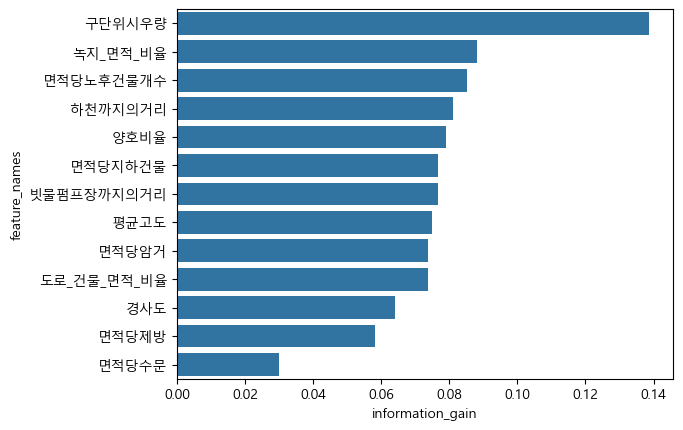

In [94]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["font.family"]="Malgun Gothic"

plt.figure()
sb.barplot(x=info_df["information_gain"],y=info_df["feature_names"])
#plt.title("Information_Gain")
plt.xticks(labels=[x.replace("_") for x in info_df["feature_names"]])
plt.show()